In [2]:
# Used for manipulation of directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Used to import csv files
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Loading the data

In [3]:
df = pd.read_csv('FuelConsumption.csv', usecols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'])
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


In [4]:
# We store the CO2 Emissions separately as our y-values.
yCoords = np.stack(df['CO2EMISSIONS'])
numFeatures = 5

# We create an array of all the features, like before we must add a feature of 1 at the start so that we can treat theta_0 as simply another feature.
xCoords = np.stack((np.ones(yCoords.size), df['ENGINESIZE'], df['CYLINDERS'], df['FUELCONSUMPTION_CITY'], df['FUELCONSUMPTION_COMB']), axis = 1)
print('Feature Values:\n', xCoords, '\n')
print('CO 2 Emission Values:\n', yCoords)

Feature Values:
 [[ 1.   2.   4.   9.9  8.5]
 [ 1.   2.4  4.  11.2  9.6]
 [ 1.   1.5  4.   6.   5.9]
 ...
 [ 1.   3.   6.  13.4 11.8]
 [ 1.   3.2  6.  12.9 11.3]
 [ 1.   3.2  6.  14.9 12.8]] 

CO 2 Emission Values:
 [196 221 136 ... 271 260 294]


### Graphing all the different features

Text(0.5, 0, 'Engine Size')

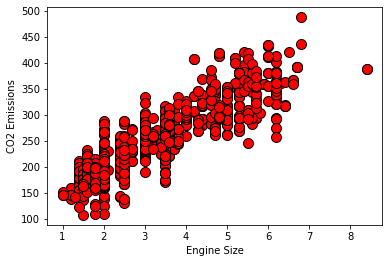

In [5]:
fig = plt.figure()  # open a new figure
plt.plot(df['ENGINESIZE'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Engine Size')

Text(0.5, 0, 'Cylinders')

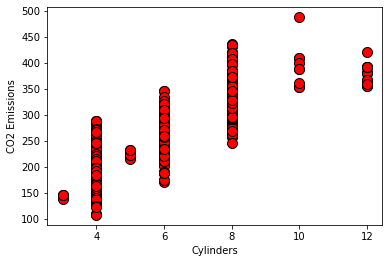

In [6]:
fig = plt.figure()  # open a new figure
plt.plot(df['CYLINDERS'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Cylinders')

Text(0.5, 0, 'Fuel Consumption (City)')

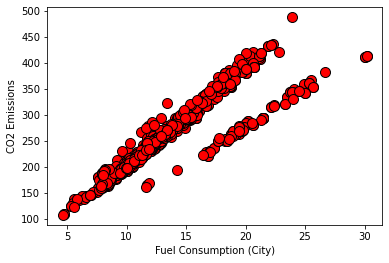

In [7]:
fig = plt.figure()  # open a new figure
plt.plot(df['FUELCONSUMPTION_CITY'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Consumption (City)')

Text(0.5, 0, 'Fuel Consumption (Comb)')

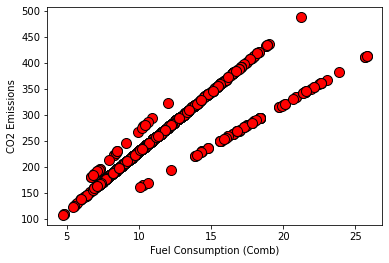

In [8]:
fig = plt.figure()  # open a new figure
plt.plot(df['FUELCONSUMPTION_COMB'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Consumption (Comb)')

In [9]:
def costFunction(xCoords, yCoords, theta):
    ''' Will return the amount of error '''
    
    # Taking the dot product of the theta values and the x coordinates to find the equation of each line
    predictions = np.dot(xCoords, theta)
    
    # Defining an accumulator to retain the amount of error that is produced
    totalError = 0
    
    m = len(yCoords) # number of coordinates
     
    # Calculating the total error produced by the line
    totalError = 1/(2 * m) * np.sum(np.square(predictions - yCoords))
       
    return totalError

In [10]:
def gradientDescent(xCoords, yCoords, theta, epoch):
    ''' Will find the line of best fit '''
    
    errors = []
    
    m = yCoords.size
    
    predictions = np.dot(xCoords, theta)
    
    # Learning Rate
    a = 0.0001
    
    # Epoch
    for e in range(epoch):
        
        # Updating our theta values
        theta = theta - a / m * (predictions - yCoords).dot(xCoords)

        predictions = np.dot(xCoords, theta)
        
        # We save the error that our line produced on each iteration of e
        errors.append(costFunction(xCoords, yCoords, theta))
        
    return theta, errors

In [59]:
# Initializing our theta values to 1's
theta = [1 for i in range(numFeatures)]

epoch = 250

theta, errors = gradientDescent(xCoords, yCoords, theta, epoch)

print("Our approximate theta values are:\n", theta)
print('\n', errors)

Our approximate theta values are:
 [1.68572586 3.13497669 4.79297818 8.95609201 7.94231565]

 [23981.284838038413, 22189.268903662698, 20533.94078018701, 19004.87433039577, 17592.438691657964, 16287.737614758753, 15082.553429783757, 13969.295286118171, 12940.951340544083, 11991.044592286775, 11113.592086831743, 10303.067231552566, 9554.364985790111, 8862.769706128402, 8223.925444336764, 7633.8085108961695, 7088.702131297773, 6585.173035483261, 6120.04983297272, 5690.4030374731055, 5293.5266151498945, 4926.9209403414, 4588.277051360283, 4275.462107215443, 3986.505953651717, 3719.588713891897, 3473.0293259198747, 3245.274954105563, 3034.891208479413, 2840.553110051445, 2661.0367452687474, 2495.211557045993, 2342.033223813131, 2200.537081728023, 2069.8320486230396, 1949.0950114148561, 1837.5656416258525, 1734.5416063620376, 1639.3741445832782, 1551.4639808023971, 1470.2575504751044, 1395.2435133058927, 1325.9495325085452, 1261.9392997350196, 1202.8097869338676, 1148.188707828685, 1097.732

Text(0, 0.5, 'Cost')

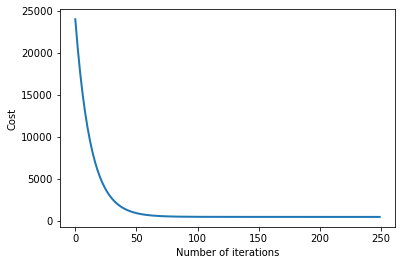

In [60]:
# Plotting the error
#fig = plt.figure()  # open a new figure
plt.plot(np.arange(len(errors)), errors, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

### Plotting the line of best fit for every feature

Text(0.5, 0, 'Engine Size')

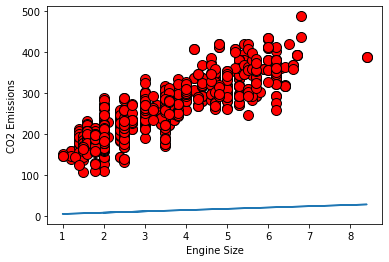

In [61]:
fig = plt.figure()  # open a new figure
plt.plot(df['ENGINESIZE'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

engineSizeFeatures = [theta[0], theta[1]]
engineSizexCoords = np.stack((np.ones(yCoords.size), df['ENGINESIZE']), axis = 1)

plt.plot(xCoords[:,1], np.dot(engineSizexCoords, engineSizeFeatures), '-') # plotting the line of best fit
# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Engine Size')

Text(0.5, 0, 'Cylinders')

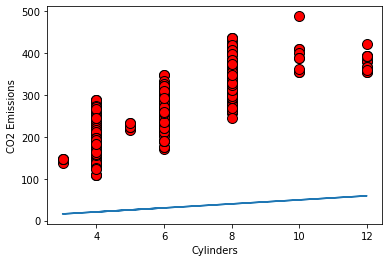

In [68]:
fig = plt.figure()  # open a new figure
plt.plot(df['CYLINDERS'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

cylinderFeatures = [theta[0], theta[2]]
cylinderxCoords = np.stack((np.ones(yCoords.size), df['CYLINDERS']), axis = 1)

plt.plot(xCoords[:,2], np.dot(cylinderxCoords, cylinderFeatures), '-') # plotting the line of best fit

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Cylinders')

Text(0.5, 0, 'Fuel Consumption (City)')

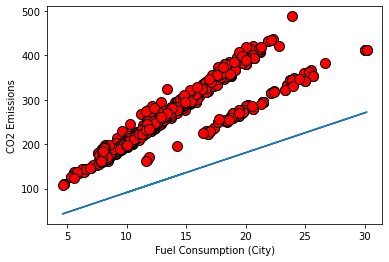

In [63]:
fig = plt.figure()  # open a new figure
plt.plot(df['FUELCONSUMPTION_CITY'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

fuelConsumption_CityFeatures = [theta[0], theta[3]]
fuelConsumption_CityxCoords = np.stack((np.ones(yCoords.size), df['FUELCONSUMPTION_CITY']), axis = 1)

plt.plot(xCoords[:,3], np.dot(fuelConsumption_CityxCoords, fuelConsumption_CityFeatures), '-') # plotting the line of best fit

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Consumption (City)')

Text(0.5, 0, 'Fuel Consumption (Comb)')

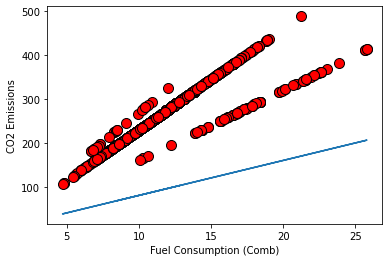

In [66]:
fig = plt.figure()  # open a new figure
plt.plot(df['FUELCONSUMPTION_COMB'], yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

fuelConsumption_CombFeatures = [theta[0], theta[4]]
fuelConsumption_CombxCoords = np.stack((np.ones(yCoords.size), df['FUELCONSUMPTION_COMB']), axis = 1)

plt.plot(xCoords[:,4], np.dot(fuelConsumption_CombxCoords, fuelConsumption_CombFeatures), '-') # plotting the line of best fit

# Axis Labels
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Consumption (Comb)')